2021-09-21: CFD Class, V. Kumar 

In [55]:
#Step 1: Grid generation
#Step 2: Discretization
#Step 3: Solution of equations

### Example 4.3
In the final worked example of this chapter we discuss the cooling of a circular fin by means of convective heat transfer along its length. Convection gives rise to a temperature-dependent heat loss or sink term in the governing equation. Shown in Figure 4.9 is a cylindrical fin with uniform cross-sectional area A. The base is at a temperature of 100°C (TB) and the end is insulated. The fin is exposed to an ambient temperature of 20°C. One-dimensional heat transfer in this situation is governed by

$$ {d \over dx}  \left[ \kappa A {dT \over dx } \right] - h P (T-T_\infty)= 0 \tag{1} $$

where h is the convective heat transfer coefficient, P the perimeter, k the thermal conductivity of the material and $T_\infty$ the ambient temperature. Calculate the temperature distribution along the fin and compare the results with the analytical solution given by

$$ {{{T-T_\infty} \over {T_B-T_\infty}}} = {{cosh[n(L-x)]} \over {cosh(nL)} } \tag{2} $$


where $n^2 = hP/(kA)$, L is the length of the fin and x the distance along the fin. Data: L = 1 m, $hP/(kA) = 25/m^2$ (note that kA is constant).


[[20. -5.  0.  0.  0.]
 [-5. 15. -5.  0.  0.]
 [ 0. -5. 15. -5.  0.]
 [ 0.  0. -5. 15. -5.]
 [ 0.  0.  0. -5. 10.]] [1100.  100.  100.  100.  100.]
[100.          64.22764228  36.91056911  26.50406504  22.60162602
  21.30081301  20.        ]


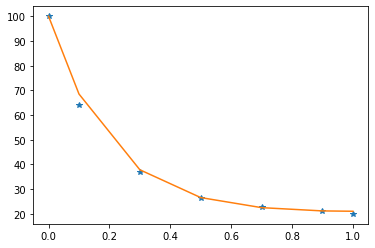

In [1]:
import numpy as np
import matplotlib.pyplot as plt

TA = 100; Tinf=20; q=500; L=1; dx=0.2; n=np.int(L/dx); 
nsq=25; k=1; A=1; hp=nsq*k*A; # nsq=hPbykA; 
x = np.linspace(0+dx/2,L-dx/2,n); #Step 1 Grid generation
xall = np.zeros(n+2); xall[0]=0; xall[n+1]=L; xall[1:n+1]=x; # Grid including the BC

#Step 2 Discretization
aW = k*A/dx; aE=k*A/dx; sP=-hp*k*A*dx; sU=hp*k*A*dx*Tinf; # Internal nodes
aWA = 0; aEA=k*A/dx; sPA=-2*k*A/dx -hp*k*A*dx; sUA=2*k*A/dx*TA + hp*k*A*dx*Tinf; # BC node 1
aWB = k*A/dx; aEB=0; sPB=-hp*k*A*dx; sUB=hp*k*A*dx*Tinf; # BC node n

A=np.zeros([n,n]); b=np.zeros(n); T=np.zeros(n+2); T[0]=TA; T[n+1]=Tinf; #Initialization

for i in range(n):
    aP=aW + aE - sP; bP=sU;
    if(i==0):
        A[i,i] = aWA + aEA - sPA; A[i,i+1] = -aEA; b[i] = sUA; 
    elif (i==n-1):
        A[i,i] = aWB + aEB - sPB; A[i,i-1] = -aWB; b[i] = sUB; 
    else:
        A[i,i] = aW + aE - sP; A[i,i-1] = -aW; A[i,i+1] = -aE; b[i] = sU; 

print(A, b)
           
T[1:n+1] = np.linalg.solve(A,b); #Step 3: Solve

n=np.sqrt(nsq);
Texact = lambda x: Tinf + (TA-Tinf)*np.cosh(n*(L-x))/np.cosh(n*L); # Exact solution
print(T)

plt.plot(xall, T, '*', xall, Texact(xall))